In [1]:
from google.colab import drive
drive.mount('/content/drive')
# монтаж диска

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Первичная загрузка данных и проверка их на пропуски**

# **1.1 Загрузка метаданных по лекциям и проверка на пропуски**

Метаданные для лекций, которые пользователи смотрят по мере продвижения в своем образовании

In [11]:
import pandas as pd

# Укажите путь к файлу на Google Диске
url = '/content/drive/MyDrive/HW4/lectures.csv'

# Чтение файла CSV в DataFrame
df_lecture = pd.read_csv(url, encoding='utf-8')
df_lecture.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


Описание данных для метаданных лекции:      

lecture_id: внешний ключ для столбца train/test content_id, если тип содержимого — lecture (1).

part: код категории верхнего уровня для лекции.

tag: один код тега для лекции. Значение тегов не будет указано, но этих кодов достаточно для объединения лекций в одну группу.

type_of: краткое описание основной цели лекции

In [12]:
df_lecture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


Проверка металанных для лекции на пропуски (подсчет количества пропусков)

In [13]:
missing_values = df_lecture.isnull().sum()
print(missing_values)

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64


Пропусков в метаданных по лекциям нет.

# 1.2 Загрузка данных по вопросам

In [27]:
url = '/content/drive/MyDrive/HW4/questions.csv'

# Чтение файла CSV в DataFrame
df_questions = pd.read_csv(url, encoding='utf-8')
df_questions.head(100)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
95,95,95,3,1,9 10 81
96,96,96,2,1,9 10 92
97,97,97,1,1,131 93 162 29
98,98,98,1,1,10 178 162 81


question_id: внешний ключ для столбца train/test content_id, если тип содержимого — вопрос (0).

bundle_id: код, для которого вопросы обслуживаются вместе.

correct_answer: ответ на вопрос. Можно сравнить со столбцом поезда, чтобы проверить, прав ли был пользователь.user_answer

part: соответствующий раздел теста TOEIC.

tags: один или несколько подробных кодов тегов для вопроса. Значение тегов не будет указано, но этих кодов достаточно для объединения вопросов в группу

In [15]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [16]:
missing_values = df_questions.isnull().sum()
print(missing_values)

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64


In [17]:
Нужно удалить один нулевой тэг

SyntaxError: invalid syntax (<ipython-input-17-d57cfb14af32>, line 1)

In [18]:
df_questions_cleaned = df_questions.dropna()
df_questions_cleaned
missing_values_df_questions_cleaned = df_questions_cleaned.isnull().sum()
print(missing_values_df_questions_cleaned)

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              0
dtype: int64


In [19]:
df_questions_cleaned[['part','question_id']].groupby(['part'], as_index=False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1211
6,7,1160


Вопросы распределены равномерно за исключением части 5

# **1.3 Загрузить данные по ответам пользвателея на вопросы по лекциям**

In [20]:
import dask.dataframe as dd
import pandas as pd

url = '/content/drive/MyDrive/HW4/train.csv'

from google.colab import drive

drive.mount('/content/drive/')

   # Чтение CSV из Google Drive
df_train = dd.read_csv(url, encoding='utf-8').sample(frac=0.001)
pandas_df_train = df_train.compute()

pandas_df_train.head(100)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
427779,427779,12831449452,8534262,4645,0,335,3,1,31000.0,True
190833,190833,784105190,3892809,6680,0,1269,0,1,23000.0,True
894544,894544,74254,18708396,747,0,3,1,1,27000.0,False
25412,25412,1595665528,459017,8385,0,280,2,0,6000.0,True
968825,968825,529496268,19971658,8770,0,613,0,1,19000.0,True
...,...,...,...,...,...,...,...,...,...,...
216838,216838,38646426823,4306379,9210,0,119,1,1,38000.0,True
371243,371243,20212006,7171715,7486,0,2493,1,1,6000.0,True
409661,409661,1909090187,7996363,5994,0,916,1,0,20000.0,True
725171,725171,1229865154,15330125,4228,0,341,0,0,12000.0,True


In [ ]:
row_id: (int64) Идентификационный код строки.

timestamp: (int64) время в миллисекундах между этим взаимодействием пользователя и первым завершением события от этого пользователя.

user_id: (int32) Идентификационный код пользователя.

content_id: (int16) Идентификационный код для взаимодействия с пользователем

content_type_id: (int8) 0, если событие было вопросом, заданным пользователю, 1, если событие было просмотром пользователем лекции.

task_container_id: (int16) Идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит объяснения для любого из них. Все эти три будут иметь общую .task_container_id

user_answer: (int8) ответ пользователя на вопрос, если таковой имеется. Читайте -1 как null, для лекций.

answered_correctly: (int8), если пользователь ответил правильно. Читайте -1 как null, для лекций.

prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем пакете вопросов, игнорируя любые лекции между ними. Имеет значение null для первого пакета вопросов пользователя или лекции. Обратите внимание, что время — это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем пакете.

prior_question_had_explanationУвидел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Это значение является общим для одного пакета вопросов и имеет значение NULL для первого пакета вопросов или лекции пользователя. Как правило, первые несколько вопросов, которые видит пользователь, были частью диагностического теста, в ходе которого он не получил никакой обратной связи.

In [ ]:
Информация о датафрейме:

In [21]:
pandas_df_train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012270e+05,1.012270e+05,1.012270e+05,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000,98855.000000
mean,5.061582e+07,7.689808e+09,1.076746e+09,5211.260988,0.019441,895.243680,1.370178,0.623361,25331.793748
std,2.922134e+07,1.162583e+10,6.196866e+08,3867.761288,0.138071,1343.590699,1.193111,0.523132,19666.298768
min,2.780000e+02,0.000000e+00,8.623000e+03,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2.529229e+07,5.269733e+08,5.405855e+08,2063.000000,0.000000,104.000000,0.000000,0.000000,16000.000000
50%,5.061902e+07,2.656360e+09,1.071828e+09,5013.000000,0.000000,380.000000,1.000000,1.000000,21000.000000
75%,7.591568e+07,9.836511e+09,1.615691e+09,7402.000000,0.000000,1082.000000,3.000000,1.000000,29666.000000
max,1.012296e+08,8.675600e+10,2.147471e+09,32736.000000,1.000000,9999.000000,3.000000,1.000000,300000.000000


Проверка на пропуски данных:

In [ ]:
missing_data = pandas_df_train.isnull().sum()
print(missing_data)

Оценим общее количество записей в датафрейме для принятия решения, чт о будет делать с пропускамии данным:

In [29]:
total_records = pandas_df_train.shape[0]
total_records

101227

In [ ]:
Примерно незаполнено 2,3 % строк датафрейма содержат пропуски данных по признаку prior_question_elapsed_time - Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем пакете вопросов

In [22]:
df_train = dd.read_csv(url, dtype={'prior_question_elapsed_time': 'float64', 'answer_correctly': 'int64'})

Исключаем все пропуски в данных train

In [23]:
df_train_cleaned = pandas_df_train.dropna()


In [24]:
df_train_cleaned.head(100)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
427779,427779,12831449452,8534262,4645,0,335,3,1,31000.0,True
190833,190833,784105190,3892809,6680,0,1269,0,1,23000.0,True
894544,894544,74254,18708396,747,0,3,1,1,27000.0,False
25412,25412,1595665528,459017,8385,0,280,2,0,6000.0,True
968825,968825,529496268,19971658,8770,0,613,0,1,19000.0,True
...,...,...,...,...,...,...,...,...,...,...
371243,371243,20212006,7171715,7486,0,2493,1,1,6000.0,True
409661,409661,1909090187,7996363,5994,0,916,1,0,20000.0,True
725171,725171,1229865154,15330125,4228,0,341,0,0,12000.0,True
1074420,1074420,10273094123,22621427,5987,0,1998,0,1,41000.0,True


# **1.4 Метрики**

1. Процент праивльных ответов у пользователей на вопросы

In [33]:

negative_answers = df_train_cleaned[df_train_cleaned['answered_correctly'] == 1]

In [34]:
result = negative_answers
print(result)

            row_id    timestamp     user_id  content_id  content_type_id  \
71982        71982   5027919088     1534072        6440                0   
219375      219375   3390989707     4324252        2350                0   
728662      728662  15049953305    15330125        2157                0   
759534      759534   1013050460    15631705        4141                0   
1008485    1008485  26144490650    21063761        9966                0   
...            ...          ...         ...         ...              ...   
177987   100327708   5029929354  2129787779        3869                0   
1050560  101200281    689554880  2146941665        3364                0   
93913    100243634    216765044  2127695426         732                0   
421080   100570801   2148507130  2135276564        8837                0   
57572    100207293  10816618470  2126955935        4994                0   

         task_container_id  user_answer  answered_correctly  \
71982                  5

In [35]:
# количество уникальный пользовтелей
unique_users_count = df_train_cleaned['user_id'].nunique()
print(unique_users_count)

54979


Посмотрим статистику ответов на вопросы по каждому пользователю:

In [36]:
user_answer  = df_train_cleaned[['user_id', 'user_answer', 'answered_correctly']]\
.groupby(['user_id'], as_index = False).sum()

In [37]:
user_answer.describe()

,user_id,user_answer,answered_correctly
count,5.497900e+04,54979.000000,54979.000000
mean,1.075727e+09,2.554957,1.181397
std,6.206131e+08,2.886136,1.395491
min,1.150000e+02,0.000000,0.000000
25%,5.385054e+08,1.000000,0.000000
50%,1.074894e+09,2.000000,1.000000
75%,1.613529e+09,3.000000,1.000000
max,2.147483e+09,42.000000,21.000000


In [38]:
user_answer['cor'] = user_answer['answered_correctly']/user_answer['user_answer']
user_answer.rename(columns={'user_answer':'number_of_answers_per_user'}, inplace=True)
user_answer.describe()

,user_id,number_of_answers_per_user,answered_correctly,cor
count,5.497900e+04,54979.000000,54979.000000,50910.00
mean,1.075727e+09,2.554957,1.181397,inf
std,6.206131e+08,2.886136,1.395491,NaN
min,1.150000e+02,0.000000,0.000000,0.00
25%,5.385054e+08,1.000000,0.000000,0.25
50%,1.074894e+09,2.000000,1.000000,0.50
75%,1.613529e+09,3.000000,1.000000,1.00
max,2.147483e+09,42.000000,21.000000,inf


2.0


<Axes: xlabel='number_of_answers_per_user', ylabel='Count'>

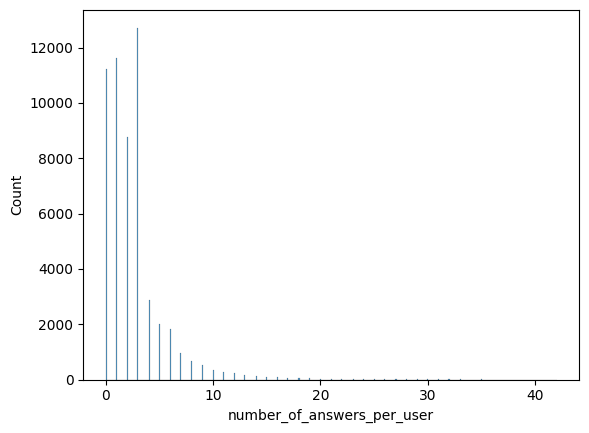

In [39]:
import seaborn as sns
print(user_answer.number_of_answers_per_user.median())
sns.histplot(data = user_answer, x = 'number_of_answers_per_user')
# распределение ответов по пользователям и видим, что у нас есть смещение вправа

In [40]:
# Найдем процент правильных ответов всех пользователей
# Объединение train_data с questions_data
merged_data = pd.merge(df_questions, df_train_cleaned, left_on='question_id', right_on='content_id')

# Вычисление процента правильных ответов
total_questions = merged_data.shape[0]
correct_answers = merged_data[merged_data['user_answer'] == merged_data['correct_answer']].shape[0]

percent_correct = (correct_answers / total_questions) * 100 if total_questions > 0 else 0
print(percent_correct)

65.68836658946793


Мы видим, что результаты очень хорошие у пользователей

In [41]:
# Распределение правильных ответов по каждому пользователю
# Группировка по пользователям
user_stats = merged_data.groupby('user_id').agg(
    total_answers=('user_answer', 'count'),
    correct_answers=('user_answer', lambda x: (x == merged_data.loc[x.index, 'correct_answer']).sum()),
    average_time=('answered_correctly', 'mean')  # Предполагаем, что у нас есть колонка времени
).reset_index()

# Вычисление процента правильных ответов
user_stats['percent_correct'] = (user_stats['correct_answers'] / user_stats['total_answers']) * 100

# Переименование столбцов для ясности
user_stats.rename(columns={'average_time': 'average_time_spent'}, inplace=True)

In [ ]:
print(user_stats.head(100))

График зависимости User ID и количества правильных ответов пользователя

Здесь мы можем увидеть статистику по правильным ответам у пользователей.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=user_stats.index, y='correct_answers', data=user_stats.reset_index())
plt.title('Количество правильных ответов пользователями')
plt.xlabel('User ID')
plt.ylabel('Количество правильных ответов')
plt.xticks(rotation=45)  # Если user_id много, чтобы читалось проще
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

График "Пользователь - среднее время ответа пользователя, сек"

In [29]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=user_stats.index, y='average_time', data=user_stats.reset_index())
plt.title('Среднее время ответа пользователями')
plt.xlabel('User ID')
plt.ylabel('Среднее время ответа (в секундах)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'user_stats' is not defined

<Figure size 1200x600 with 0 Axes>

Анализ влияния тегов на успеваемость

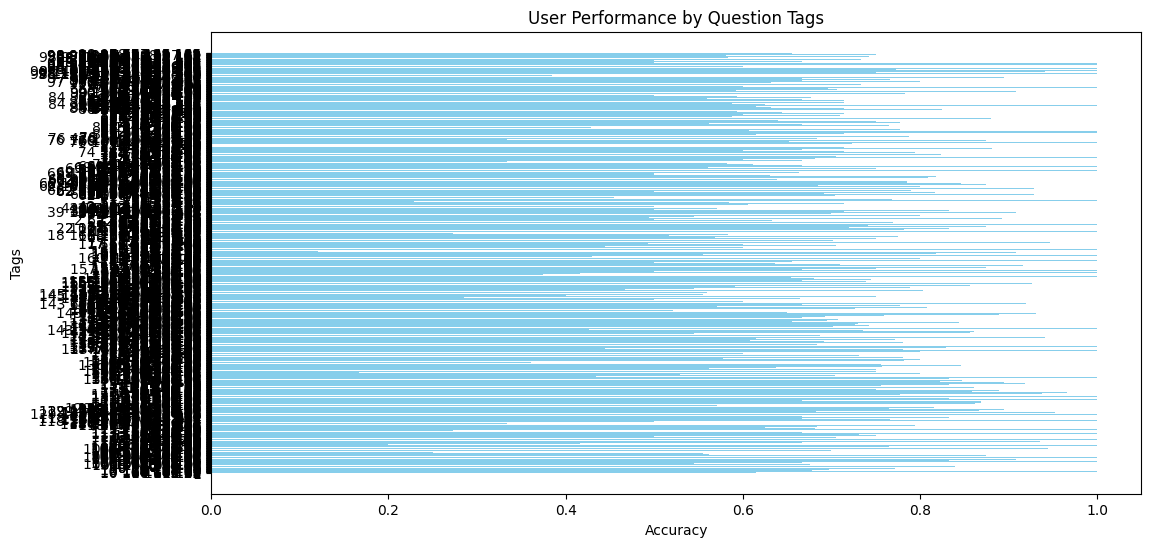

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
# 2. Объединение данных
merged_df = df_train_cleaned.merge(df_questions, how='left', left_on='content_id', right_on='question_id')

# 3. Расчет успеваемости по тегам
tag_performance = merged_df.groupby('tags').agg(
    total_attempts=('answered_correctly', 'count'),
    total_correct=('answered_correctly', lambda x: (x == 1).sum())
).reset_index()

tag_performance['accuracy'] = tag_performance['total_correct'] / tag_performance['total_attempts']

# 4. Визуализация результатов
plt.figure(figsize=(12, 6))
plt.barh(tag_performance['tags'], tag_performance['accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Tags')
plt.title('User Performance by Question Tags')
plt.show()

Заключение:
1. Чем больше было вопросов в пользвателя, тем меньшее количество праивльных ответов у одного пользователя
2. Процент правильных ответов у пользователей составил в общем слечае 65%, что является довольно высоким результатом
3. Вопросы по частям распределны более менее равномерно за исключением части 5. Там примерно в 4 раза больше вопросов, чем в остальных разделах
4. График по тегам показывает наиболее сложные темы, там где горизонтальные столбики меньщей длины - темы наиболее сложные, а там где доходят почти до конца - темы более легкие.
